## Описание проекта

* Клиент - интернет-магазин "Стримчик".
* Мотив - определить потенциально популярный продукт для планирования рекламных кампаний.
* Задача - выявить закономерности, определяющие успешность продаж компьютерных игр по историческим данным о продажах из открытых источников.

## Изучение данных заказчика

Импортируем необходимые библиотеки для начала работы:


In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import math
import seaborn as sns
from datetime import datetime as dt

Откроем базу данных и ознакомимся с ней:

In [2]:
try:
    game_sales=pd.read_csv('')
except:
    game_sales=pd.read_csv('')

In [3]:
display(game_sales.head())
display (game_sales.info())
display (game_sales.isna().sum())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Вывод

Таблица "game_sales" содержит информацию о продажах компьютерных игр из открытых источников, а также экспертные , пользовательские оценки этих игр, жанры и платформы.

В таблице 16715 строк, 10 столбцов и 1 столбец с индексами.
Данные имеют пропуски, не приведены к опрятному виду ("змеиный регистр"), в некоторых столбцах необходимо преобразование типа данных. 

Так столбец "Year_of_Release", содержащий информацию о годе выпуска игры, необходимо привести к типу данных "datetime" на этапе предобработки данных.

Столбец "User_Score" с информацией о пользовательском рейтинге приведем к формату "float".

В данных много пропусков в столбцах с оценками пользователей и экспертов, рейтинга ESRB и немного пропусков в годе выпуска игр.
Хорошо, что данные о продажах и платформах заполнены полностью.

Приступим к предобработке данных.

## Предобработка данных

Проверим данные на наличие явных дубликатов. 

In [4]:
game_sales.duplicated().sum()

0

### Замена названий столбцов

Видим, что столбцы имеют строчные буквы. Приведем названия колонок к нижнему регистру:

In [5]:
game_sales.columns = [x.lower() for x in game_sales.columns]

In [6]:
game_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование данных в нужные типы

Столбец "year_of_release" можно привести к типу "datetime". Однако в нем содержится только информация о годе выпуска игры, но в формате вещественного числа, также имеются пропуски. Удалим пропуски и приведем столбец к формату целых чисел. Заодно удалим пропуски в столбце "name".

In [7]:
game_sales=game_sales.dropna(subset=['name','year_of_release'])
game_sales=game_sales.reset_index(drop=True)

In [8]:
display (game_sales.isna().sum())
display (game_sales.info())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Видим, что вместе с пропусками в столбцах 'name','year_of_release' исчез пропуск в "genre" и сократились пропуски в остальных столбцах.
Значит, данные строки датасета были малоинформативны, имели слишком много незаполненных значений.

База данных сократилась с 16715 до 16444 строк, что составляет 1,65%.

In [9]:
game_sales['year_of_release']=game_sales['year_of_release'].astype('int')
game_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Столбец 'year_of_release' приведен к необходимому виду.

Столбец "User_Score" с информацией о пользовательском рейтинге приведем к формату "float". 
Перед этим изучим его уникальные значения.

In [10]:
game_sales['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Видим, что есть много строк, содержащих 'tbd' (To Be Determined, то есть "Будет определено"). 
Заменим 'tbd' на nan и оставим в таблице, так как замена средним по столбце с оценкой пользователей приведет к искажению данных.

In [11]:
game_sales['user_score']=game_sales['user_score'].replace('tbd','Nan')
game_sales['user_score']=game_sales['user_score'].astype('float')

Исследуем значения столбца 'rating'. В нем:
* E - для всех
* T - для подростков
* M - для взрослых
* E10+ - для детей от 10 лет
* EC - для детей от 3х лет
* K-A * EC - для детей от 3х лет
* AO - только для взрослых
* RP - не определен

In [12]:
game_sales['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Заменим редко встречающиеся рейтинги на частые по смыслу:

In [13]:
game_sales['rating']=game_sales['rating'].replace('K-A','E')
game_sales['rating']=game_sales['rating'].replace('EC','E')
game_sales['rating']=game_sales['rating'].replace('RP','M')
game_sales['rating']=game_sales['rating'].replace('AO','M')

In [14]:
game_sales['rating']=game_sales['rating'].fillna('No_rating')

In [15]:
game_sales['rating'].value_counts()

No_rating    6676
E            3932
T            2905
M            1538
E10+         1393
Name: rating, dtype: int64

Так как пропусков данных в рейтинге осталось большое количество, делать замену данных неэффективно. Оставим пропуски в таблице.

### Суммарные продажи во всех регионах

Создадим столбец с общей суммой продаж по регионам:


In [16]:
game_sales['total_sales']=game_sales['na_sales']+game_sales['eu_sales']+game_sales['jp_sales']+game_sales['other_sales']

In [17]:
game_sales.sort_values(by='total_sales', ascending=False).tail(25)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15926,Rewrite,PSV,2014,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,No_rating,0.01
15925,Road Trip: Shifting Gears,GBA,2002,Racing,0.01,0.00,0.00,0.0,NaN,7.6,E,0.01
15914,50 Classic Games,3DS,2012,Misc,0.00,0.01,0.00,0.0,NaN,NaN,No_rating,0.01
15905,Diary Girl,DS,2008,Misc,0.01,0.00,0.00,0.0,NaN,NaN,E,0.01
15906,Shitsuji ga Aruji o Erabu Toki,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,No_rating,0.01
15907,Rayman Raving Rabbids,PC,2006,Misc,0.00,0.01,0.00,0.0,58.0,7.6,E,0.01
15908,War for the Overworld,PC,2015,Strategy,0.00,0.01,0.00,0.0,65.0,7.7,No_rating,0.01
15909,World Poker Tour,GBA,2005,Misc,0.01,0.00,0.00,0.0,NaN,NaN,E,0.01
15910,Best Of Tests,DS,2008,Puzzle,0.01,0.00,0.00,0.0,NaN,NaN,No_rating,0.01
15911,Infinite Stratos 2: Love and Purge,PSV,2015,Action,0.00,0.00,0.01,0.0,NaN,NaN,No_rating,0.01


Проверим, есть ли игры с нулевыми продажами. Если есть, удалим эти строки.

In [18]:
game_sales.query('total_sales == 0.00').index

Int64Index([16405, 16438], dtype='int64')

In [19]:
game_sales.drop(game_sales.query('total_sales == 0.00').index,inplace=True)

In [20]:
game_sales.query('total_sales == 0.00').index

Int64Index([], dtype='int64')

Заметим, что встречаются игры с одинаковым названием.

In [21]:
game_sales['name'].duplicated().sum()

5017

In [22]:
game_sales.loc[:,['name','platform']].duplicated().sum()

3

Игр с одинаковым названием и на одной платформе всего 3. Найдем их и посмотрим на данные.

In [23]:
game_sales[game_sales.groupby(game_sales['name'] + game_sales['platform'])['name'].transform('count') > 1].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01
1177,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
5883,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11534,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08


Удалим дубликаты по имени и платформе с малым количесвом продаж.

In [24]:
game_sales.drop(1574,inplace=True)
game_sales.drop(11534,inplace=True)
game_sales.drop(15969,inplace=True)

Найдем лидеров продаж, сгруппировав данные по названию игры.

In [25]:
(game_sales.groupby('name')['total_sales'].agg('sum').reset_index().sort_values(by='total_sales', ascending=False).head(25))

,name,total_sales
10947,Wii Sports,82.54
3693,Grand Theft Auto V,56.58
9287,Super Mario Bros.,45.31
9670,Tetris,35.84
5545,Mario Kart Wii,35.52
10949,Wii Sports Resort,32.77
7308,Pokemon Red/Pokemon Blue,31.38
1232,Call of Duty: Modern Warfare 3,30.60
6689,New Super Mario Bros.,29.80
1227,Call of Duty: Black Ops II,29.40


### Вывод

В процессе предобработки данных заменили названия столбцов, избавились от данных с критичными пропусками (в названии игры, годе выпуска), заменили часть данных в столбцах с рейтингами.
Также посчитали суммарные продажи игр по всем регионам, определили лидеров по продажам.

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы


In [26]:
game_sales.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='name', ascending=False)

,name
year_of_release,
2009,1426
2008,1425
2010,1255
2007,1197
2011,1136
2006,1006
2005,938
2002,829
2003,775


Видим, что число выпускаемых игр росло от 9 штук в 1980 году, до 1426 в 2009 году.
Посмотрим на данные в динамике.

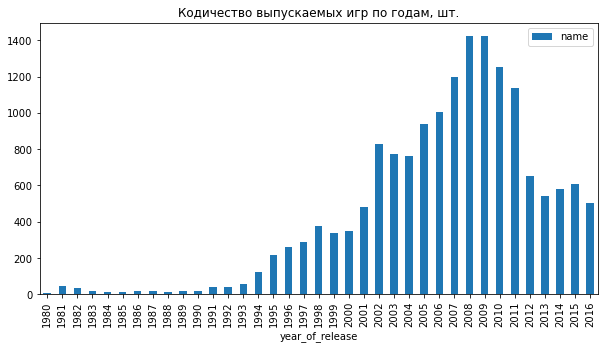

In [27]:
game_sales.pivot_table(index='year_of_release', values='name', aggfunc='count').\
plot(kind='bar', figsize=(10,5), title='Кодичество выпускаемых игр по годам, шт.');

С 2002 года по 2011 отмечаем бурный рост выпуска игр. С 2012 года наблюдаем снижение числа выпускаемых игр.

Отобразим динамику выпуска игр и количество продаж на графике.

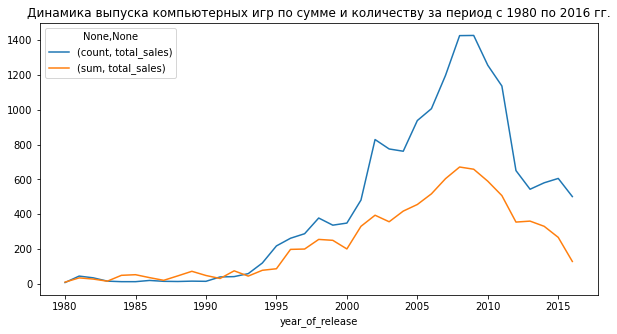

In [28]:
game_sales.pivot_table(index='year_of_release', values='total_sales', aggfunc=['count', 'sum']).plot( figsize=(10,5), title='Динамика выпуска компьютерных игр по сумме и количеству за период с 1980 по 2016 гг.');

Определим среднее число проданных копий, приходящееся на 1 игру.

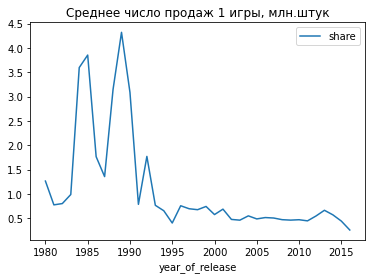

In [29]:
mean_sales=game_sales.pivot_table(index='year_of_release', values=['total_sales'], aggfunc=['sum', 'count']).rename(columns={'sum':'sum_total_sales', 'count':'count_total_sales'})
mean_sales['share']=mean_sales['sum_total_sales']/mean_sales['count_total_sales']
mean_sales.plot( y='share', title='Среднее число продаж 1 игры, млн.штук');

Видим, что после 2000 года в среднем каждая игра продается 0,5 млн тиражом. 

Однако для меня оказалось странным снижение числа игр в 2012 году. Прочитав аналитические статьи на тему трендов и продаж в компьютерных играх , поняла, что собранные нами данные неполные. Они отображают не все типы платформ. Например, вообще нет мобильной платформы, которая стремительно набрала популярность в 2012 году. 

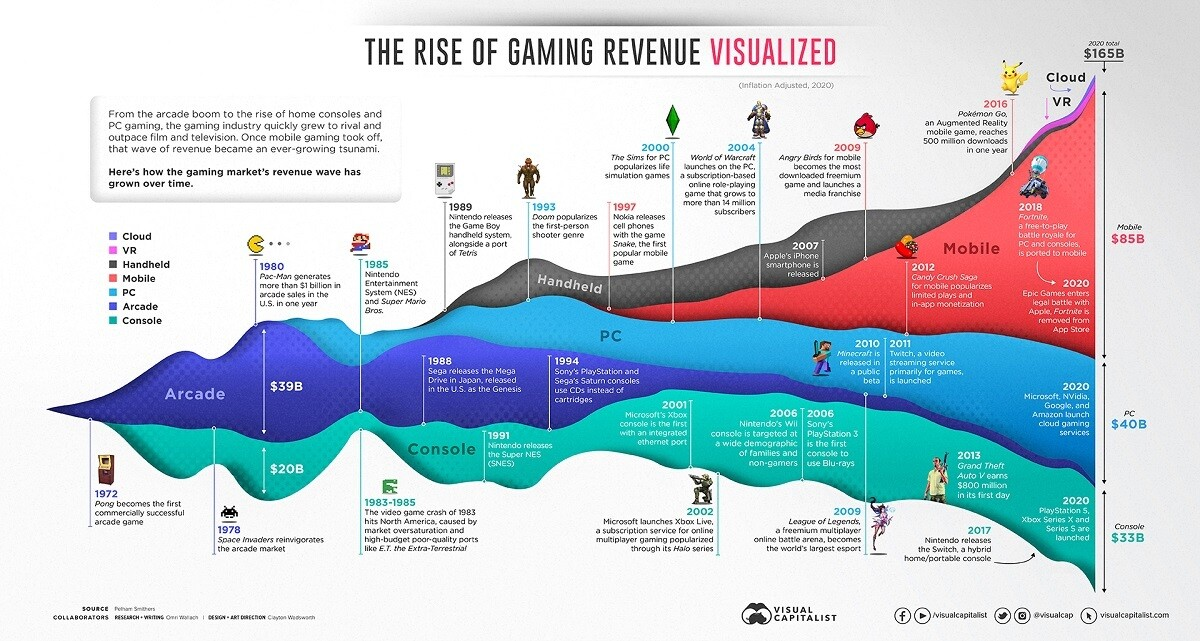

https://dtf.ru/gameindustry/293659-kak-menyalas-vyruchka-igrovoy-industrii-za-50-let ссылка на источник картинки

In [30]:
game_sales['platform'].value_counts()

PS2     2126
DS      2121
PS3     1304
Wii     1286
X360    1231
PSP     1193
PS      1190
PC       956
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Разделим имеющиеся у нас платформы по типам, используя категоризацию. 
Напишем функцию для автоматической обработки значений в столбце "platform". Это понадобится для дальнейшего анализа.

In [31]:
def platform_type(row):
    platform=row['platform']
    pc=['PC']
    console=['PS2', 'PS3', 'Wii', 'X360', 'PS', 'XB', 'GC', 'PS4', 'N64', 'XOne', 'SNES', 'SAT', 'WiiU', '2600', 'NES', 'DC', 'GEN', '3DO', 'TG16', 'PCFX']
    portable = ['DS', 'PSP', 'GBA', '3DS', 'PSV', 'GB', 'SCD', 'WS', 'GG']
    others=['NG']
    if platform in pc:
        return 'pc'
    if platform in console:
        return 'console'
    if platform in portable:
        return 'portable'
    if platform in others:
        return 'others'
game_sales['platform_type']=game_sales.apply(platform_type, axis=1)

In [32]:
game_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_type
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,console
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No_rating,40.24,console
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,console
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,console
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No_rating,31.38,portable


#### Вывод
Видим, что в наших данных вообще нет мобильной платформы. Поэтому число выпускаемых игр и проданных копий уменьшается с 2012 года, так как мобильные платформы стремительно набирали популярность.

Также отметим, что данные за все периоды неважны, так как они теряют свою информативность.

### Продажи по платформам

Определим наиболее популярные платформы по количеству проданных копий игр.

In [33]:
platform_sales=game_sales.groupby('platform')['total_sales'].agg('sum').reset_index().sort_values(by='total_sales', ascending=False).head(25)
platform_sales=platform_sales.query('total_sales >= 15')
platform_sales

,platform,total_sales
16,PS2,1233.56
28,X360,959.99
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


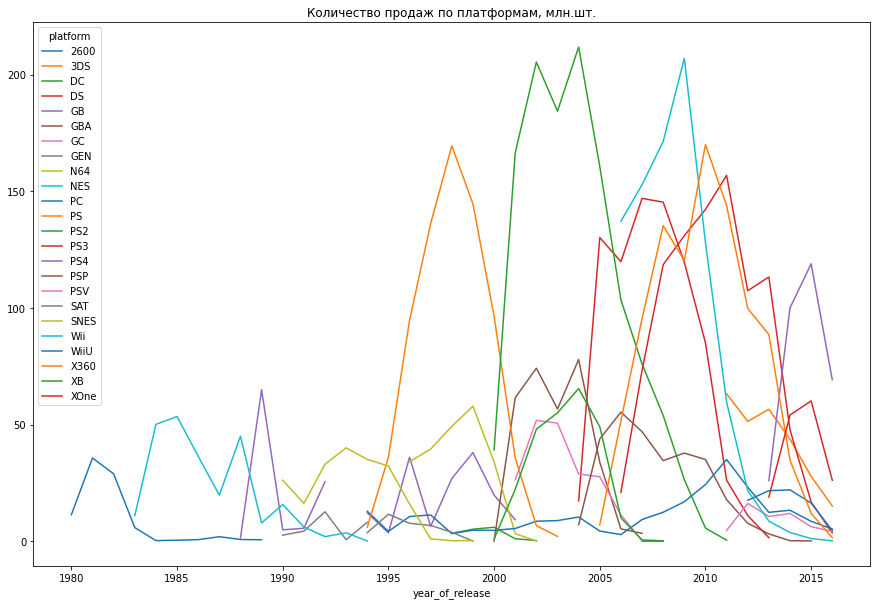

In [34]:
game_sales.query('platform in @platform_sales.platform').pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(15,10), title='Количество продаж по платформам, млн.шт.');

На графике видим, что на любой платформе есть год старта продаж и последний год продаж. Между ними обычно находится пик продаж.
Посчитаем среднее время жизни платформы:

Среднее время дизни платформы в годах: 9.5


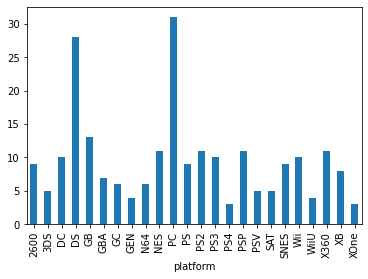

In [35]:
years=game_sales[['platform','year_of_release']]
years=years.query('platform in @platform_sales.platform')
years=years.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
years.columns=['min_year', 'max_year']
years['duration_year']=years['max_year']-years['min_year']
print('Среднее время дизни платформы в годах: {:.1f}'. format(years['duration_year'].mean()))
years['duration_year'].plot(kind='bar');

#### Вывод
Видим, что средний срок жизни платформы 9-10 лет. На середину этого периода приходится пик продаж. 
Поэтому для прогнозирования потенциального спроса необходимо брать те платформы, которые еще не достигли пика, то есть за последние 4 года. Для дальнейших расчетов берем период с 2013 по 2016 год.

### Продажи по платформам в актуальном периоде

Проанализируем продажи по типам платформ по всему датасету и в актуальном периоде с 2013 года по 2016.

In [36]:
game_sales.pivot_table(index='platform_type', values='total_sales', aggfunc='sum')

,total_sales
platform_type,
console,6581.35
others,1.44
pc,255.68
portable,1974.56


Видим, что большинство копий в мире продано для платформ типа "консоль" и "портативные". 
Постороим график по годам для наилучшего восприятия информации.

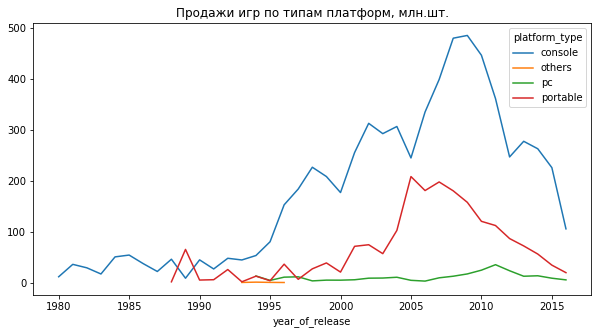

In [37]:
game_sales.pivot_table(index='year_of_release',columns='platform_type', values='total_sales', aggfunc='sum').plot( figsize=(10,5), title='Продажи игр по типам платформ, млн.шт.');

Видим, что продажи копий для компьютеров в среднем постоянны, так как рост ограничивается наличием персональных компьютеров у людей.
Продажи копий игр для консолей и портативных платформ с 2004 года переживали бурный рост до 2012 года. Это можно объяснить более низкой ценой консоли и портативной платформы, чем цена персонального компьютера. Также консоль и портативную платформу можно взять с собой, принести к другу и играть вместе. 

Посмотрим на данные по продажам в актуальном периоде.

In [38]:
actual_game_sales=game_sales.query('year_of_release >= 2013').reset_index(drop=True)

In [39]:
actual_game_sales.shape

(2233, 13)

In [40]:
len(game_sales)/len(actual_game_sales)

7.361845051500224

Видим, что данных в таблице "actual_game_sales" в 7 раз меньше, чем в начальной таблице "game_sales".
Это говорит о том, что многие данные неинформативны и малопригодны.


In [41]:
actual_game_sales.pivot_table(index='platform_type', values='total_sales', aggfunc='sum')

,total_sales
platform_type,
console,869.98
pc,39.43
portable,181.28


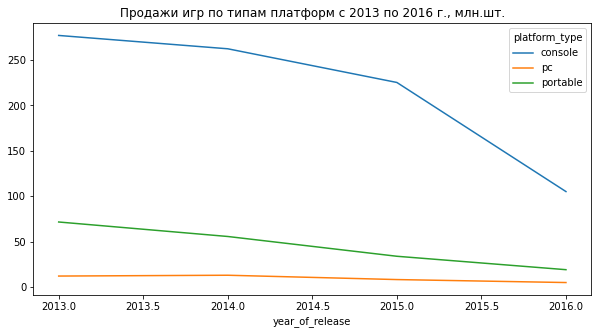

In [42]:
actual_game_sales.pivot_table(index='year_of_release',columns='platform_type', values='total_sales', aggfunc='sum').plot( figsize=(10,5),title='Продажи игр по типам платформ с 2013 по 2016 г., млн.шт.');

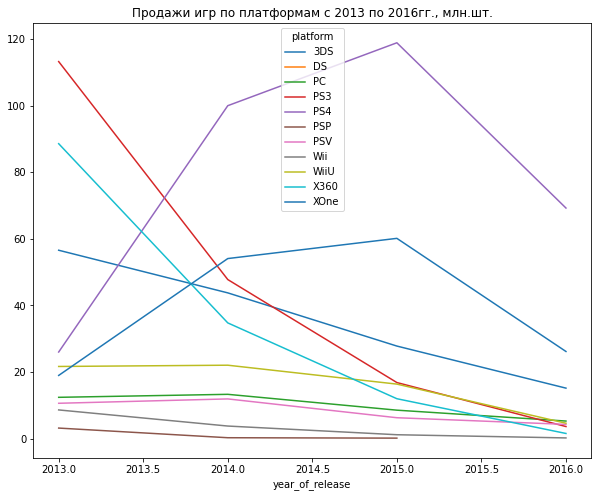

In [43]:
actual_game_sales.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum').plot( figsize=(10,8), title='Продажи игр по платформам с 2013 по 2016гг., млн.шт.');

In [44]:
actual_game_sales.pivot_table(index=['platform_type','platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)


total_sales
platform_type platform             
console       PS4            314.14
              PS3            181.43
              XOne           159.32
portable      3DS            143.25
console       X360           136.80
              WiiU            64.63
pc            PC              39.43
portable      PSV             32.99
console       Wii             13.66
portable      PSP              3.50
              DS               1.54

Видим, что за последние 4 года все продажи приходятся всего на 11 платформ, причем первые 3 места уверенно занимают платформы типа "консоль".

Так как разница между первыми 9 и последними 2-мя местами различается на порядок, то считаем потенциально прибыльными первые 9 платформ. Избавим таблицу с актуальным периодом от данных с потенциально непривлекательными платформами.

In [45]:
actual_game_sales=actual_game_sales.query('platform not in ("PSP","DS")').reset_index(drop=True)

In [46]:
actual_game_sales['platform'].nunique()

9

In [47]:
actual_game_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_type
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,console
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,console
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No_rating,14.63,console
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,No_rating,14.60,portable
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,console
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01,portable
2154,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01,portable
2155,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01,console
2156,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01,portable


Посмотрим на диапазон нормальных значений продаж по каждой игре внутри платформы. "Mean total_sales" - это величина продаж в среднем по игре на платформе. 

In [48]:
actual_game_sales.pivot_table(index='platform', values='total_sales', aggfunc=['mean','count','sum'])

,mean,count,sum
,total_sales,total_sales,total_sales
platform,,,
3DS,0.472772,303,143.25
PC,0.208624,189,39.43
PS3,0.525884,345,181.43
PS4,0.801378,392,314.14
PSV,0.092151,358,32.99
Wii,0.593913,23,13.66
WiiU,0.562000,115,64.63
X360,0.735484,186,136.80


Видим, что наибольшей популярностью пользуются игры на PS4. Каждая игра, выходящая на этой платформе, продается 0,801 млн копий. Далее по популярности X360 (0,735 млн. шт.), XOne (0,645 млн. шт.)

Построим графики по платформам типа "boxplot":

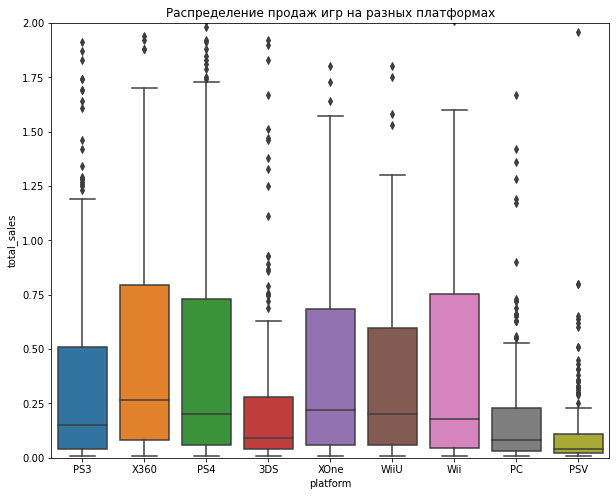

In [49]:
plt.figure(figsize=(10,8))
(sns.boxplot(data = actual_game_sales, y ='total_sales', x='platform').set(title='Распределение продаж игр на разных платформах', ylim=(0,2)))
 
plt.show()

In [50]:
print(actual_game_sales.groupby('platform')['total_sales'].describe())

          count      mean       std   min    25%    50%    75%    max
platform                                                             
3DS       303.0  0.472772  1.381347  0.01  0.040  0.090  0.280  14.60
PC        189.0  0.208624  0.352304  0.01  0.030  0.080  0.230   3.05
PS3       345.0  0.525884  1.451939  0.01  0.040  0.150  0.510  21.05
PS4       392.0  0.801378  1.609456  0.01  0.060  0.200  0.730  14.63
PSV       358.0  0.092151  0.153816  0.01  0.020  0.040  0.110   1.96
Wii        23.0  0.593913  0.915432  0.01  0.045  0.180  0.755   3.58
WiiU      115.0  0.562000  1.038778  0.01  0.060  0.200  0.595   7.09
X360      186.0  0.735484  1.663275  0.01  0.080  0.265  0.795  16.27
XOne      247.0  0.645020  1.036139  0.01  0.060  0.220  0.685   7.39


Наиболее потенциально привлекательны платформы с широкими "усами" и большими нормальными диапазонами. По ним можно ожидать с большей долей вероятности успешных продаж. Поэтому ожидаем, что PS4,X360,Wii,XOne,WiiU,PS3 будут продаваться и дальше с лидирующими на рынке результатами.

Посмотрим, как влияют на продажи "PS4" оценки пользователей и критиков. Для этого построим диаграммы рассеивания и определим коэффициент корреляции Пирсона.

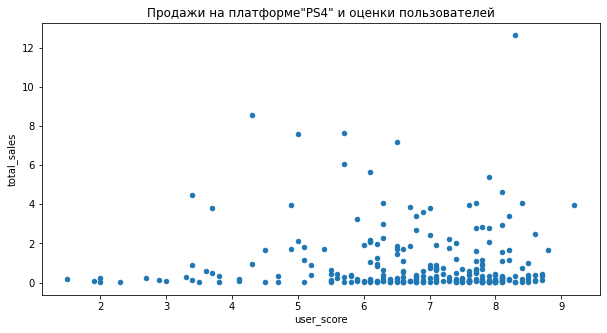

In [51]:
actual_game_sales.query('platform == "PS4"').plot(x='user_score', y= 'total_sales', kind='scatter', title='Продажи на платформе"PS4" и оценки пользователей', figsize=(10,5));

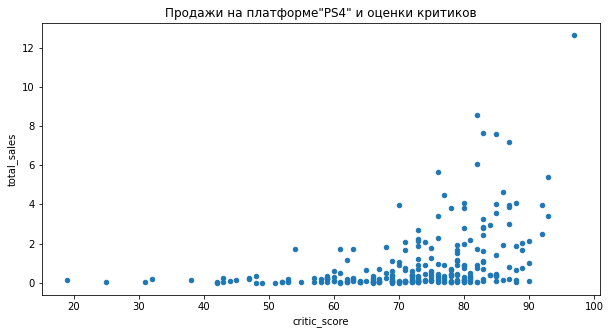

In [52]:
actual_game_sales.query('platform == "PS4"').plot(x='critic_score', y= 'total_sales', kind='scatter', title='Продажи на платформе"PS4" и оценки критиков', figsize=(10,5));

По графикам видим, что оценки критиков больше влияют на продажи, чем оценки пользователей. Чем выше оценка критиков, тем больше продаж. 
Продажи больше "размазаны" на графике с оценками пользователей. Это можно объяснить тем, что оценки пользователей более субъективны, а оценки критиков выставляют по единым строгим критериям, они меньше зависят от субъективной оценки.

In [53]:
actual_game_sales.query('platform == "PS4"')[['critic_score','user_score','total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


По таблице корреляции видим, что на объем продаж в большей степени влияет оценка критиков (0,406), чем оценка пользователей (-0,032).
Причем по общим данным влияние оценки критиков ниже (0,314), чем на платформе "PS4", влияние оценки пользователей в 10 раз меньше (0,003).
Видимо, платформа "PS4" является очень популярной, но видим многочисленных приверженцев в мире и их противников. Поэтому мнения пользователей сильно влияют на решение о покупке. 
Другие платформы менее популярны, поэтому на них так не влияют оценки пользователей и критиков.


In [54]:
actual_game_sales[['critic_score','user_score','total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.502354,0.313789
user_score,0.502354,1.000000,-0.003068
total_sales,0.313789,-0.003068,1.000000


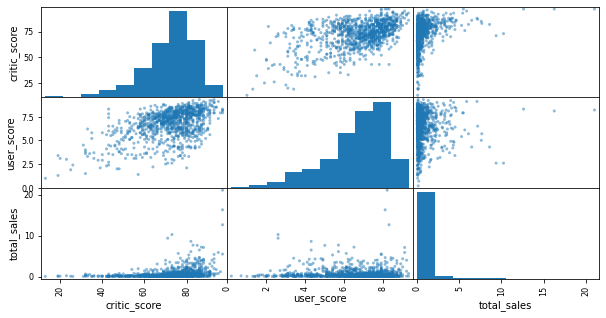

In [55]:
pd.plotting.scatter_matrix(actual_game_sales[['critic_score','user_score','total_sales']], figsize=(10,5));

Определим влияние на продажи оценки критиков и пользователей по каждой платформе:

In [56]:
names=list(actual_game_sales['platform'].unique())
for name in names:
    print('Платформа',name)
    print('Влияние оценки критиков',round((actual_game_sales.query('platform in @name')['critic_score'].corr(actual_game_sales.query('platform in @name')['total_sales'])), 4))
    print('Влияние оценки пользователей',round((actual_game_sales.query('platform in @name')['user_score'].corr(actual_game_sales.query('platform in @name')['total_sales'])),4))
   

Платформа PS3
Влияние оценки критиков 0.3343
Влияние оценки пользователей 0.0024
Платформа X360
Влияние оценки критиков 0.3503
Влияние оценки пользователей -0.0117
Платформа PS4
Влияние оценки критиков 0.4066
Влияние оценки пользователей -0.032
Платформа 3DS
Влияние оценки критиков 0.3571
Влияние оценки пользователей 0.2415
Платформа XOne
Влияние оценки критиков 0.417
Влияние оценки пользователей -0.0689
Платформа WiiU
Влияние оценки критиков 0.3764
Влияние оценки пользователей 0.4193
Платформа Wii
Влияние оценки критиков nan
Влияние оценки пользователей 0.6829
Платформа PC
Влияние оценки критиков 0.196
Влияние оценки пользователей -0.0938
Платформа PSV
Влияние оценки критиков 0.2547
Влияние оценки пользователей 0.0009


Видим, что наибольшее влияние оценки критиков оказывают на XOne (0.417), PS4 (0.4066), WiiU (0.3764),3DS (0.3571).

Наибольшее влияние оценки пользователей оказывают на продажи Wii (0.6829, нет оценки критиков),WiiU (0.4193), 3DS (0.2415).


Определим наиболее популярные жанры игр.

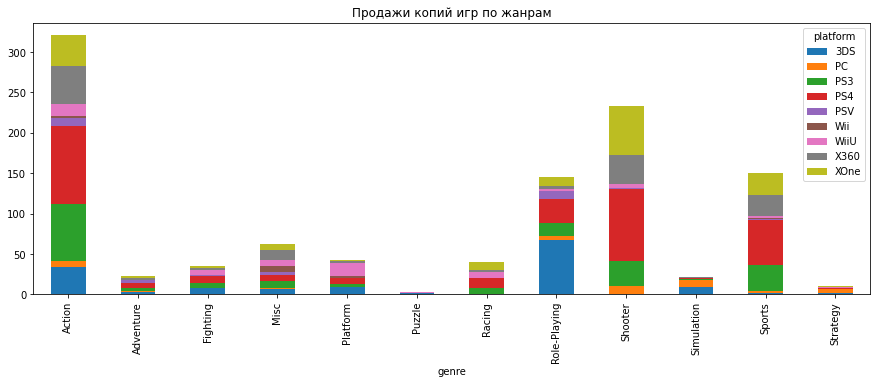

In [57]:
(actual_game_sales
 .pivot_table(index='genre',
              columns='platform',
              values='total_sales',
              aggfunc='sum')
 .plot(kind='bar', stacked=True, figsize=(15,5), title='Продажи копий игр по жанрам')
                   );

Видим, что по продажам копий лидируют жанры Action,Shooter,Sports,Role-Playing.

In [58]:
(actual_game_sales
 .pivot_table(index='genre',
              columns=['platform_type', 'platform'],
              values='total_sales',
              aggfunc='sum',
             
             ).apply(lambda x: x / x.sum())
 .style
 .format("{:.1%}")
)

Видим, что по большую долю продаж на каждой платформе занимают популярные жанры Action,Shooter,Sports,Role-Playing.

Однако платформы имеют свои особенности:
* на PC популярны Shooter 25%,Simulation 20,6%,Action 18,4%.
* на 3DS популярны Role-Playing 47,0%, Action 23,8%.
* на XOne популярны Shooter 37,9%, Action 23,4%.
* на PS3 популярны Shooter 17,5%, Action 39,1%.

In [59]:
(actual_game_sales
 .pivot_table(index='genre',
              columns=['platform_type', 'platform'],
              values='total_sales',
              aggfunc='mean',
              margins=True,
              margins_name='total mean'
             )
)

platform_type   console                                                    \
platform            PS3       PS4       Wii      WiiU      X360      XOne   
genre                                                                       
Action         0.622105  0.667361  0.352500  0.307292  0.767581  0.438941   
Adventure      0.148966  0.226429  0.180000  0.056667  0.160000  0.191429   
Fighting       0.252083  0.480556       NaN  1.522500  0.364286  0.350000   
Misc           0.464444  0.409500  1.008571  0.410000  1.387778  0.391053   
Platform       0.370000  0.640833  1.125000  1.084667  0.356667  0.186000   
Puzzle         0.040000  0.020000       NaN  0.330000       NaN       NaN   
Racing         0.496923  0.638947       NaN  3.680000  0.255833  0.489500   
Role-Playing   0.336531  0.568431       NaN  0.386000  0.553750  0.753571   
Shooter        1.025484  2.160000       NaN  0.685000  1.043529  1.587632   
Simulation     0.118333  0.205000  0.140000  0.200000  0.222500  0.172500   
Sports         0.688298  1.208913  0.316667  0.492000  0.837419  0.703684   
Strategy       0.152500  0.103333  0.260000  0.610000  0.280000  0.140000   
total mean     0.525884  0.801378  0.593913  0.562000  0.735484  0.645020   

platform_type        pc  portable           total mean  
platform             PC       3DS       PSV             
genre                                                   
Action         0.145200  0.293448  0.077760   0.426210  
Adventure      0.046364  0.123333  0.040116   0.108531  
Fighting       0.050000  1.172857  0.119000   0.446709  
Misc           0.177500  0.221875  0.202632   0.428562  
Platform       0.035000  0.586000  0.078333   0.582500  
Puzzle              NaN  0.192222  0.030000   0.186471  
Racing         0.060625       NaN  0.033333   0.469294  
Role-Playing   0.270556  1.086613  0.131154   0.508281  
Shooter        0.307500  0.060000  0.720000   1.245882  
Simulation     0.386190  0.635333  0.016667   0.353279  
Sports         0.150769  0.227500  0.122353   0.720817  
Strategy       0.251500  0.115455  0.050000   0.182909  
total mean     0.208624  0.472772  0.092151   0.503082

In [60]:
(actual_game_sales
 .pivot_table(index='year_of_release',
              columns='genre',
              values='total_sales',
              aggfunc='sum',
              margins=True,
              margins_name='total')
)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,total
year_of_release,,,,,,,,,,,,,
2013,121.35,5.40,7.07,25.04,23.85,0.96,12.37,43.42,62.04,8.42,40.54,6.10,356.56
2014,97.15,5.52,15.85,23.36,8.81,1.49,16.66,45.62,65.21,5.58,45.06,0.98,331.29
2015,71.90,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85,267.86
2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13,129.94
total,320.51,22.90,35.29,62.57,41.94,3.17,39.89,144.86,232.98,21.55,149.93,10.06,1085.65


Видим, что в разрезе лет выпуск игр снижается, но помним, что нет анализа мобильной платформы. 

## Вывод

В результате проведения исследовательского анализа данных определили:
число выпускаемых игр росло от 9 штук в 1980 году, до 1426 в 2009 году.
Видим, что в наших данных вообще нет мобильной платформы. Поэтому число выпускаемых игр и проданных копий уменьшается с 2012 года, так как мобильные платформы стремительно набирали популярность.

Также отметим, что данные за все периоды неважны, так как они теряют свою информативность.
Видим, что средний срок жизни популярной платформы 9-10 лет. На середину этого периода приходится пик продаж. 
Поэтому для прогнозирования потенциального спроса необходимо брать те платформы, которые еще не достигли пика, то есть за последние 4 года.
Видим, что большинство копий в мире продано для платформ типа "консоль" и "портативные". 
Постороим график по годам для наилучшего восприятия информации.
Видим, что продажи копий для компьютеров в среднем постоянны, так как рост ограничивается наличием персональных компьютеров у людей.
Продажи копий игр для консолей и портативных платформ с 2004 года переживали бурный рост до 2012 года. Это можно объяснить более низкой ценой консоли и портативной платформы, чем цена персонального компьютера. Также консоль и портативную платформу можно взять с собой, принести к другу и играть вместе. 
Видим, что за последние 4 года все продажи приходятся всего на 11 платформ, причем первые 4 места уверенно занимают платформы типа "консоль".

Так как разница между первыми 9 и последними 2-мя местами различается на порядок, то считаем потенциально прибыльными первые 9 платформ. Избавим таблицу с актуальным периодом от данных с потенциально непривлекательными платформами.
Видим, что наибольшей популярностью пользуются игры на PS4. Каждая игра, выходящая на этой платформе, продается 0,801 млн копий. Далее по популярности X360 (0,735 млн. шт.), XOne (0,645 млн. шт.)

Наиболее потенциально привлекательны платформы с широкими "усами" и большими нормальными диапазонами. По ним можно ожидать с большей долей вероятности успешных продаж. Поэтому ожидаем, что PS4,X360,Wii,XOne,WiiU,PS3 будут продаваться и дальше с лидирующими на рынке результатами.
По таблице корреляции видим, что на объем продаж в большей степени влияет оценка критиков (0,406), чем оценка пользователей (-0,032).
Причем по общим данным влияние оценки критиков ниже (0,314), чем на платформе "PS4", влияние оценки пользователей в 10 раз меньше (0,003).
Видимо, платформа "PS4" является очень популярной, но видим многочисленных приверженцев в мире и их противников. Поэтому мнения пользователей сильно влияют на решение о покупке. 
Другие платформы менее популярны, поэтому на них так не влияют оценки пользователей и критиков.
Видим, что наибольшее влияние оценки критиков оказывают на XOne (0.417), PS4 (0.4066), WiiU (0.3764),3DS (0.3571).

Наибольшее влияние оценки пользователей оказывают на продажи Wii (0.6829, нет оценки критиков),WiiU (0.4193), 3DS (0.2415).

Видим, что по большую долю продаж на каждой платформе занимают жанры популярные жанры Action,Shooter,Sports,Role-Playing.

Однако платформы имеют свои особенности:
* на PC популярны Shooter 25%,Simulation 20,6%,Action 18,4%.
* на 3DS популярны Role-Playing 47,0%, Action 23,8%.
* на XOne популярны Shooter 37,9%, Action 23,4%.
* на PS3 популярны Shooter 17,5%, Action 39,1%.

## Портрет пользователя по регионам продаж

Определим для каждого региона продаж самые популярные платформы. Найдем топ-5 и опишем различия в долях продаж.

In [61]:
for column in ['na_sales', 'eu_sales','jp_sales']:
    print(f'Топ-5  платформ по продажам в регионе {column}')
    display(actual_game_sales
            .pivot_table(index='platform',values=column,aggfunc='sum').apply(lambda x: x / x.sum())
            .sort_values(by=column, ascending = False)
           .head())

Топ-5  платформ по продажам в регионе na_sales


,na_sales
platform,
PS4,0.248753
XOne,0.213021
X360,0.186805
PS3,0.145262
3DS,0.087386


Топ-5  платформ по продажам в регионе eu_sales


,eu_sales
platform,
PS4,0.360650
PS3,0.173334
XOne,0.131873
X360,0.108688
3DS,0.079139


Топ-5  платформ по продажам в регионе jp_sales


,jp_sales
platform,
3DS,0.493200
PS3,0.169831
PSV,0.135210
PS4,0.116081
WiiU,0.079133


In [62]:
for column in ['na_sales', 'eu_sales','jp_sales']:
    print(f'Доля продаж в регионе {column} по типам платформ')
    display(actual_game_sales
            .pivot_table(index='platform_type',values=column,aggfunc='sum').apply(lambda x: x / x.sum())
            .sort_values(by=column, ascending = False))

Доля продаж в регионе na_sales по типам платформ


,na_sales
platform_type,
console,0.875669
portable,0.098916
pc,0.025415


Доля продаж в регионе eu_sales по типам платформ


,eu_sales
platform_type,
console,0.840444
portable,0.094732
pc,0.064825


Доля продаж в регионе jp_sales по типам платформ


,jp_sales
platform_type,
portable,0.628409
console,0.371591
pc,0.000000


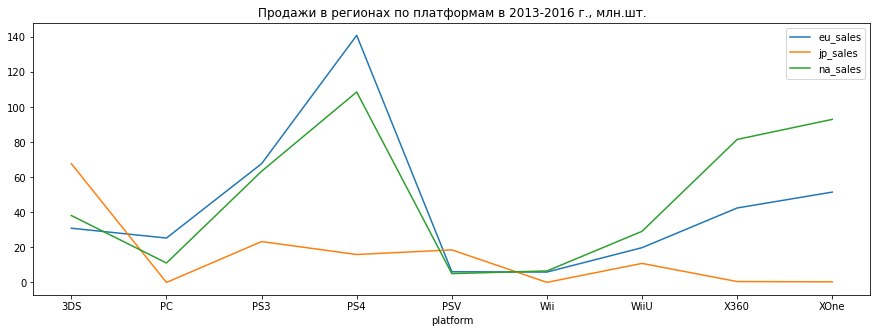

In [63]:
(actual_game_sales
 .pivot_table(index='platform',
              values=['na_sales', 'eu_sales','jp_sales' ],
              aggfunc='sum')
 .plot( figsize=(15,5), title='Продажи в регионах по платформам в 2013-2016 г., млн.шт.')

);

In [64]:
region_platform_table = actual_game_sales.pivot_table(index='platform',values=['na_sales', 'eu_sales','jp_sales' ],aggfunc='sum', margins=True)
region_platform_table['eu_na_jp']=region_platform_table['eu_sales']+region_platform_table['na_sales']+region_platform_table['jp_sales']
region_platform_table.sort_values(by='eu_na_jp', ascending=False)

,eu_sales,jp_sales,na_sales,eu_na_jp
platform,,,,
All,391.21,137.49,437.14,965.84
PS4,141.09,15.96,108.74,265.79
PS3,67.81,23.35,63.50,154.66
XOne,51.59,0.34,93.12,145.05
3DS,30.96,67.81,38.20,136.97
X360,42.52,0.51,81.66,124.69
WiiU,19.85,10.88,29.21,59.94
PC,25.36,0.00,11.11,36.47
PSV,6.10,18.59,5.04,29.73


Видим, что есть существенные различия между Японией и Северной Америкой и Евросоюзом. Так в Японии лидируют портативные платформы, в отличие от других регионов, и вообще не используются платформы на персональном компьютере. В Северной Америке и Евросоюзе лидируют консоли с отрывом от портативных платформ почти в 10 раз. 

В Японии нет продаж по X360,XOne, на долю которых в других регионах приходится 40% в Северной Америке и 25% в Евросоюзе от всех продаж региона.
Лидер в Евросоюзе и Северной Америке PS4. В Северной Америке второе место занимает семейство консолей XOne,X360, а в Евросоюзе второе место принадлежит PS3.

Среди лидеров по платформам по количеству проданных копий игр выделяем PS4, PS3, XOne, 3DS,X360.

Теперь определим топ-5 самых популярных жанров по регионам.

In [65]:
for column in ['na_sales', 'eu_sales','jp_sales']:
    print(f'Топ-5  популярных жанров в регионе {column}')
    display(actual_game_sales
            .pivot_table(index='genre',values=column,aggfunc='sum').apply(lambda x: x / x.sum())
            .sort_values(by=column, ascending = False)
           .head())

Топ-5  популярных жанров в регионе na_sales


,na_sales
genre,
Action,0.287848
Shooter,0.251041
Sports,0.149311
Role-Playing,0.106144
Misc,0.062817


Топ-5  популярных жанров в регионе eu_sales


,eu_sales
genre,
Action,0.301296
Shooter,0.224585
Sports,0.154239
Role-Playing,0.094502
Racing,0.051609


Топ-5  популярных жанров в регионе jp_sales


,jp_sales
genre,
Role-Playing,0.363736
Action,0.288385
Misc,0.065678
Fighting,0.055495
Shooter,0.048076


In [66]:
genre_platform_table = actual_game_sales.pivot_table(index='genre',values=['na_sales', 'eu_sales','jp_sales' ],aggfunc='sum', margins=True)
genre_platform_table['eu_na_jp']=genre_platform_table['eu_sales']+genre_platform_table['na_sales']+genre_platform_table['jp_sales']
genre_platform_table=genre_platform_table.sort_values(by='eu_na_jp', ascending=False).reset_index(drop=False)
genre_platform_table

,genre,eu_sales,jp_sales,na_sales,eu_na_jp
0,All,391.21,137.49,437.14,965.84
1,Action,117.87,39.65,125.83,283.35
2,Shooter,87.86,6.61,109.74,204.21
3,Role-Playing,36.97,50.01,46.40,133.38
4,Sports,60.34,4.91,65.27,130.52
5,Misc,20.00,9.03,27.46,56.49
6,Platform,15.15,4.79,17.93,37.87
7,Racing,20.19,2.30,12.96,35.45
8,Fighting,8.55,7.63,15.55,31.73
9,Adventure,8.22,5.11,7.14,20.47


В Евросоюзе и Северной Америке первые 4 места идентичны и с очень близкой структурой в продажах, это 1- Action, 2-Shooter, 3- Sports, 4- Role-Playing.

В Японии абсолютно другие лидеры по жанрам в компьютерных играх. Там лидируют Role-Playing, с небольшим отрывом далее Action.
По жанру игры видим, что:
* 'Action' - Имеет акцент на борьбе, включает в себя прохождение определённых уровней для достижения битвы с боссами.
* 'Shooter' - Отличаются неистовым темпом, акцентом на показные бои с использованием оружия и огромным количеством трупов
* 'Role-Playing' - Сосредоточена на решении проблем, взаимодействии с неигровыми персонажами, участии в боях, статистическом развитии персонажа
* 'Misc' - разное
* 'Sports' - Отражают соревнования по существующим видам спорта
* 'Fighting' - Основное внимание уделяется бою один на один
* 'Racing' - Соревнованиями по времени между персонажами или транспортными средствами

Различия в структуре жанров игр вызваны различиями в менталитете регионов. Агрессивные, часто жестокие игры лидируют в NA, EU, а в Японии лидер Role-Playing' - Сосредоточена на решении проблем, взаимодействии с неигровыми персонажами, участии в боях, статистическом развитии персонажа, далее Action.

Но так как емкость рынков NA, EU занчительно больше, то при выборе потенциально прибыльных игр необходимо ориентироваться на жанры - лидеры , а это 1- Action, 2-Shooter, 3-Role-Playing , 4- Sports, 5-Misc.


In [67]:
display('Продажи в регионах по рейтингу возраста пользователя')
display(actual_game_sales
 .pivot_table(index=['rating'],
                     values=['na_sales', 'eu_sales', 'jp_sales'],
                     aggfunc='sum')
 .apply(lambda col: col / col.sum(), axis=0)
 .style
 .format("{:.1%}")
 .background_gradient(cmap='Reds', axis=0)
)

'Продажи в регионах по рейтингу возраста пользователя'

,eu_sales,jp_sales,na_sales
rating,,,
E,21.2%,10.9%,18.1%
E10+,10.9%,4.3%,12.4%
M,37.1%,10.3%,37.8%
No_rating,20.1%,59.7%,20.4%
T,10.7%,14.9%,11.4%


Видим, что большая часть пользователей в Северной Америке и Евросоюзе приходится на взрослых людей. В Японии большинство использует игры без рейтинга. Вероятно, они имеют свою систему возрастных оценок игр.

По данным видим, что в Северной Америке доля игр для подростков выше (E10+ + T 12,4+11,4=23,8), чем в Евросоюзе (10,9+10,7 = 21,6). Но в Евросоюзе больше популярности имеют игры для всех категорий.

В Японии большая часть игр приходится на подростков, после категория "для всех" и "взрослые".

Посмотрим, как меняется состав популярных игр по возрастному рейтингу в разрезе актуальных жанров.

In [68]:
actual_genre=list(genre_platform_table['genre'].loc[1:5])
display('Продажи в регионах по рейтингу возраста пользователя по актуальным жанрам (без группировки)')
display (actual_game_sales.query('genre in @actual_genre')
         .pivot_table(index=['rating'], 
                      values=['na_sales', 'eu_sales', 'jp_sales'],
                      aggfunc='sum')
 .apply(lambda col: col / col.sum(), axis=0)
 .style
 .format("{:.1%}")
 .background_gradient(cmap='Reds', axis=0)
)

'Продажи в регионах по рейтингу возраста пользователя по актуальным жанрам (без группировки)'

,eu_sales,jp_sales,na_sales
rating,,,
E,18.5%,6.8%,15.8%
E10+,9.0%,3.5%,11.0%
M,43.6%,12.4%,42.6%
No_rating,19.2%,61.3%,19.7%
T,9.6%,16.0%,10.9%


In [69]:
display('Продажи в регионах по рейтингу возраста пользователя по актуальным жанрам')
display (actual_game_sales
         .query('genre in @actual_genre')
         .pivot_table(index=['genre','rating'],
                     values=['na_sales', 'eu_sales', 'jp_sales'],
                     aggfunc='sum')
 .apply(lambda col: col / col.sum(), axis=0)
 .style
 .format("{:.1%}")
 .background_gradient(cmap='Reds', axis=0)
)

'Продажи в регионах по рейтингу возраста пользователя по актуальным жанрам'

Видим, что при выборе актуальных жанров доля игр для взрослых растет, а остальные сокращаются. Это значит, что дети и подростки выбирают игры других (не из топ-5) жанров, которые не ориентированы в большей степени на взрослых. 

Непопулярные жанры в меньшей степени ориентированы на взрослых.

Так как за игры платит взрослый, то он и выбирает игру и ее жанр. Видим, что взрослые люди покупают игры чаще всего себе, чем своим детям.

### Вывод

Проанализировав регионы по количеству и характеристикам приобретаемых игр, видим, что:
* в NA, EU лидируют консоли с отрывом в 10 раз над портативными платформами (в JP наоборот, портативные платформы в 2 раза превышают консоли, вообще нет PC)
* Среди лидеров по платформам по количеству проданных копий игр в мире выделяем PS4, PS3, XOne, 3DS,X360.
* В Евросоюзе и Северной Америке первые 4 места идентичны и с очень близкой структурой в продажах, это 1- Action, 2-Shooter, 3- Sports, 4- Role-Playing. В Японии абсолютно другие лидеры по жанрам в компьютерных играх. Там лидируют Role-Playing, потом Action. 
* Так как емкость рынков NA, EU занчительно больше, то при выборе потенциально прибыльных игр необходимо ориентироваться на жанры - лидеры , а это 1- Action, 2-Shooter, 3-Role-Playing , 4- Sports, 5-Misc.
* По возрастным рейтингам в разрезе актуальных жанров в Японии 1-Без рейтинга, 2- для подростков, 3- для взрослых, 4- для детей. В Северной Америке  - 1 - для взрослых, 2- для подростков, 3- без рейтинга, 4- для детей. В Евросоюзе  - 1 - для взрослых, 2- без рейтинга, 3- для подростков, 4- для детей.


## Проверка гипотез

Н0 - средние пользовательские рейтинги платформ XOne и PC не различаются, исследуемые параметры равны.

Н1 - средние пользовательские рейтинги платформ XOne и PC различаются, параметры имеют разные значения.

In [70]:
xone_user_score=actual_game_sales[(actual_game_sales['platform'] == 'XOne')]['user_score'].dropna()
pc_user_score=actual_game_sales[(actual_game_sales['platform'] == 'PC')]['user_score'].dropna()


In [71]:
alpha=0.05
result=st.ttest_ind(xone_user_score,pc_user_score,equal_var = False)
print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    display('Отвергаем Н0')
else:
    display('Не удалось отвергнуть Н0')

p-значение: 0.14759594013430463


'Не удалось отвергнуть Н0'

Согласно статитстической оценке средние пользовательские рейтинги платформ XOne и PC не различаются. Проверим это на цифрах:

In [72]:
xone_user_score.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [73]:
pc_user_score.describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Видим, что средняя пользовательская оценка XOne равна 6,52 и PC - 6,27. В разрезе выборки разница незначительна, можно ею пренебречь.
Проверим другую гипотезу:

Н0 - средние пользовательские рейтинги жанров Action и Sports не различаются, исследуемые параметры равны.

Н1 - средние пользовательские рейтинги жанров Action и Sports различаются, параметры имеют разные значения.

In [74]:
action_user_score=actual_game_sales[(actual_game_sales['genre'] == 'Action')]['user_score'].dropna()
sports_user_score=actual_game_sales[(actual_game_sales['genre'] == 'Sports')]['user_score'].dropna()

In [75]:
genre_result=st.ttest_ind(action_user_score,sports_user_score,equal_var = False)
print('p-значение:', genre_result.pvalue)
if genre_result.pvalue < alpha:
    display('Отвергаем Н0')
else:
    display('Не удалось отвергнуть Н0')

p-значение: 2.4191414517472698e-20


'Отвергаем Н0'

Согласно статитстической оценке средние пользовательские рейтинги жанров Action и Sports различаются. Проверим это на цифрах:

In [76]:
action_user_score.describe()

count    388.000000
mean       6.842784
std        1.327847
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [77]:
sports_user_score.describe()

count    159.000000
mean       5.249686
std        1.783038
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

PS4, PS3, XOne, 3DS,X360

Видим, что средняя пользовательская оценка Action равна 6,84 и Sports - 5,25. В разрезе выборки разница значительна. Говорить о том, что жанры имеют одинаоквую оценку пользователей нельзя.

## Общий вывод

В процессе работы были изучены и предобработаны данные, собранные заказчиком. 

Данные наглядно показали, что средний срок жизни одной популярной платформы 9,5 лет. Поэтому для прогнозирования потенциально прибыльных платформ для дальнейшего анализа взяли данные за актуальный для прогноза период с 2013 по 2016 год.

По данным о количестве продаж отобрали 9 платформ, на которых выходят самые популярные и прибыльные игры, из них выбрали еще 5, которые оказались лидерами во всем мире, в т.ч. во всех регионах продаж. Это платформы  - 'PS4', 'PS3', 'XOne', '3DS','X360'. На них особой популярностью пользуются игры жанров - 'Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc'. 

Есть зависимость продаж игр от оценки критиков, что неудивительно, так как пользователи проявляют субъективное суждение в отличие от стандартизированных критериев критиков. 

По анализу мировых продаж видим, что большей популярностью пользуются игры на консолях и портативных устройствах. 
Важно, что данные заказчика вообще не учитывают мобильные платформы, которые стремительно набрали популярность в 2012 году, а после 2012 их рынок превысил продажи по консолям и портативным устройствам вместе взятым. Это естественно, так как мобильный телефон сейчас есть практически у каждого, а разработчики игр стараются делать игры, доступные по техническим характеристикам для большинства мобильных устройств. 

Поэтому для магазина "Стримчик" имеет смысл сконцентрировать свои усилия в продажах наиболее востребованных и популярных игр по отобранным нами жанрам и платформам с максимальными оценками критиков. Отбросив все неактуальные данные, получили, что 5 платформ и 5 жанров игр с оценкой критиков больше 70 баллов из 100 покроют почти 50% (484 млн. шт. из 1085 млн.шт. мирового оборота копий игр) мирового рынка компьютерных игр.

Отразим эти расчеты в таблице "potential_profit_games".


In [78]:
actual_genre

['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc']

In [79]:
top_names=['PS4', 'PS3', 'XOne', '3DS','X360']


In [80]:
potential_profit_games=(actual_game_sales
.query('platform in @top_names & genre in @actual_genre & critic_score >70')
.pivot_table(index= 'genre', columns='platform',values='total_sales',aggfunc='sum', margins=True))
                                                                                                

In [81]:
potential_profit_games

platform,3DS,PS3,PS4,X360,XOne,All
genre,,,,,,
Action,12.66,49.58,67.77,32.18,24.79,186.98
Misc,1.19,0.91,2.48,0.99,3.04,8.61
Role-Playing,6.57,6.81,16.85,3.08,8.56,41.87
Shooter,NaN,16.47,60.48,20.81,47.55,145.31
Sports,0.48,15.12,50.50,12.50,23.51,102.11
All,20.90,88.89,198.08,69.56,107.45,484.88


Рекомендуем заказчику выбирать для продажи игры на 'PS4', 'PS3', 'XOne', '3DS','X360' в жанрах 'PS4', 'PS3', 'XOne', '3DS','X360' и с оценкой критиков более 70 баллов. 
Также следить за тенденциями продаж в мире, закупать набирающие обороты игры на разных платформах, и возможно, задуматься над созданием собственной игры на мобильной платформе.